In [1]:
# Checking GPU is working or not
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 3.7 MB/s 


In [3]:
# Loading liabraries
import keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers,Sequential
from keras_tuner.tuners import RandomSearch
from keras.layers.convolutional import Conv2D

In [4]:
print(tf . __version__)

2.7.0


In [5]:
# loading datset Fasion_mnsit
fasion=keras.datasets.fashion_mnist

In [6]:
# Create train and test images
(train_images,train_labels),(test_images,test_labels)=fasion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
# Normalize
# since its a grey scale images we divide it by 255
train_images=train_images/255.0
test_images=test_images/255.0

In [8]:
train_images[0].shape

(28, 28)

In [9]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

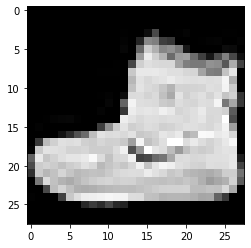

In [10]:
plt.imshow(train_images[0],cmap="gray")

In [11]:
## it looks like a shoe

In [12]:
# Reshape the data accoring to cnn i.e (len(train_images),28(height,28(width),1(channel)))
len(train_images)

60000

In [13]:
# Reshaping
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)
print("train_images shape-{}".format(train_images.shape))
print("test_images shape-{}".format(test_images.shape))

train_images shape-(60000, 28, 28, 1)
test_images shape-(10000, 28, 28, 1)


In [14]:
# Building Model
def build_model(hp):
  model=keras.Sequential()
  model.add(layers.Conv2D(
      filters=hp.Int("conv_1_filter",min_value=32,max_value=128,step=16),
      kernel_size=hp.Choice("conv_1_kernel",values=[3,5]),
      activation="relu",
      input_shape=(28,28,1)
  ))

  model.add(layers.Conv2D(
      
      filters=hp.Int("conv_2_filter",min_value=32,max_value=64,step=16),
      kernel_size=hp.Choice("conv_2_kernel",values=[3,5]),
      activation="relu"
  ))
  model.add(layers.Flatten())
  model.add(layers.Dense(
      units=hp.Int("dense_1_unit",min_value=32,max_value=128,step=16),
      activation="relu"
  ))

  model.add(layers.Dense(10,activation="softmax")) # 10 here means length of output is 10

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [15]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [16]:
# Searching for best value for the model
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='outputs',project_name="Mnist Fashions")

In [17]:
#fitting the model
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 01m 22s]
val_accuracy: 0.9144999980926514

Best val_accuracy So Far: 0.9144999980926514
Total elapsed time: 00h 06m 21s
INFO:tensorflow:Oracle triggered exit


In [22]:
tuner_search.results_summary()

Results summary
Results in outputs/Mnist Fashions
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 5
dense_1_unit: 128
learning_rate: 0.001
Score: 0.9144999980926514
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 5
dense_1_unit: 96
learning_rate: 0.001
Score: 0.9079999923706055
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 5
dense_1_unit: 48
learning_rate: 0.01
Score: 0.871666669845581
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 3
dense_1_unit: 48
learning_rate: 0.01
Score: 0.8648333549499512
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 5
dense_1_unit: 48
learning_rate: 0.01
Score: 0.8586666584014893


In [27]:
model_1=tuner_search.get_best_models(num_models=1)[0]

In [29]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 48)        153648    
                                                                 
 flatten (Flatten)           (None, 23232)             0         
                                                                 
 dense (Dense)               (None, 128)               2973824   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,130,042
Trainable params: 3,130,042
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_1.fit(train_images,train_labels,epochs=10,validation_split=0.1,initial_epoch=3) # as we alraedy done with 3 epoch to find model_1

Epoch 4/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.1296 - accuracy: 0.9513 - val_loss: 0.2727 - val_accuracy: 0.9087
Epoch 5/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0888 - accuracy: 0.9668 - val_loss: 0.3042 - val_accuracy: 0.9132
Epoch 6/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0640 - accuracy: 0.9769 - val_loss: 0.3458 - val_accuracy: 0.9145
Epoch 7/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0452 - accuracy: 0.9835 - val_loss: 0.4035 - val_accuracy: 0.9168
Epoch 8/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0348 - accuracy: 0.9874 - val_loss: 0.4418 - val_accuracy: 0.9082
Epoch 9/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0295 - accuracy: 0.9893 - val_loss: 0.4561 - val_accuracy: 0.9148
Epoch 10/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0219 - accuracy: 0.9924 - val_loss: 0.5236 